## 生成数据集

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs 
# 用于生成聚类数据集

In [3]:
x,y = make_blobs(
    n_samples = 300, #设置样本点的总数
    n_features = 2,   #设置数据的维数
    centers = 3,     #设置种类的数目
    cluster_std = 1,  #设置类内的标准差
    center_box = (-10,10), #设置取值的范围
    random_state = 233,  #设置随机数的种子
    return_centers = False, #设置一个类别中心坐标的返回值
)
# make_blobs() 会生成包含多个簇（默认3个簇）的样本数据

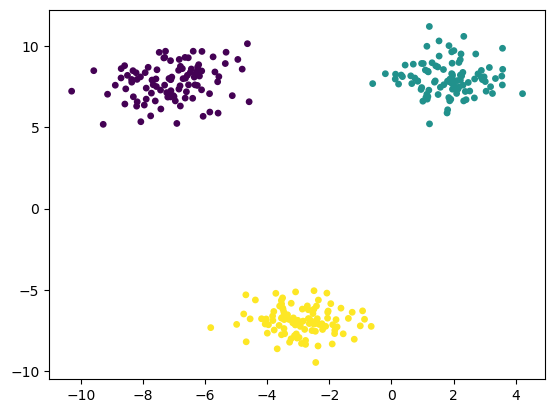

In [4]:
plt.scatter(x[:,0],x[:,1],c=y,s= 15)
plt.show()
# x[:,0]:取样本特征的第1列作为散点坐标的横坐标
# x[:,1]:取样本特征的第2列作为散点的纵坐标
# c=y:根据样本的簇标签y对散点进行颜色编码不同簇的点显示不同颜色
# s=15:设置散点的大小为15

## 划分数据集（将数据集的顺序随机打乱）

In [6]:
# 为了不改变原始的数据，考虑随机排列数据的下标
index = np.arange(20)
index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [7]:
np.random.shuffle(index)
index

array([19, 13,  7,  3, 17, 16, 12, 14, 10,  0,  9,  5, 11,  4, 15, 18,  8,
        1,  2,  6])

In [8]:
np.random.permutation(20) #也能实现同样的打乱效果

array([14,  8,  2,  1,  4, 19,  0, 18,  7, 11, 16, 17,  6,  9, 13, 15,  3,
       10,  5, 12])

In [9]:
np.random.seed(233) #为了保证效果一致，先设置随机数的种子
shuffle = np.random.permutation(len(x))
shuffle

array([ 23,  86, 204, 287, 206, 170, 234,  94, 146, 180, 263,  22,   3,
       264, 194, 290, 229, 177, 208, 202,  10, 188, 262, 120, 148, 121,
        98, 160, 267, 136, 294,   2,  34, 142, 271, 133, 127,  12,  29,
        49, 112, 218,  36,  57,  45,  11,  25, 151, 212, 289, 157,  19,
       275, 176, 144,  82, 161,  77,  51, 152, 135,  16,  65, 189, 298,
       279,  37, 187,  44, 210, 178, 165,   6, 162,  66,  32, 198,  43,
       108, 211,  67, 119, 284,  90,  89,  56, 217, 158, 228, 248, 191,
        47, 296, 123, 181, 200,  40,  87, 232,  97, 113, 122, 220, 153,
       173,  68,  99,  61, 273, 269, 281, 209,   4, 110, 259,  95, 205,
       288,   8, 283, 231, 291, 171, 111, 242, 216, 285,  54, 100,  38,
       185, 235, 174, 201, 107, 223, 222, 196, 268, 114, 147, 166,  85,
        39,  58, 256, 258,  74, 251,  15, 150, 137,  70,  91,  52,  14,
       169,  21, 184, 207, 238, 128, 219, 125, 293, 134,  27, 265,  96,
       270,  18, 109, 126, 203,  88, 249,  92, 213,  60, 227,   

In [10]:
shuffle.shape #形状中只有一个数值，说明数组是有一个维度

(300,)

In [11]:
train_size = 0.7 #设置训练集的比例，一般为0.7~0.8，具体问题具体分析

In [12]:
train_index = shuffle[:int(len(x)*train_size)] 
#int(len(x))是在计算0.7索引位置，为300*0.7=210 
#shuffle[:210]是取shuffle数组的前210个元素作为训练索引

In [13]:
test_index = shuffle[int(len(x)*train_size):]
#取shuffle数组中210之后元素作为测试集索引

In [14]:
train_index.shape,test_index.shape

((210,), (90,))

In [15]:
x[train_index].shape
# 210个样本，每个样本含有2个特征

(210, 2)

In [16]:
y[train_index].shape
# 210个样本，每个样本含有一个标签

(210,)

In [17]:
x[test_index].shape,y[test_index].shape

((90, 2), (90,))

### 封装成一个函数

In [19]:
def my_train_test_split(x,y,train_size = 0.7, random_state = None):
    if random_state:
        np.random.seed(random_state)
        shuffle = np.random.permutation(len(x))
        train_index = shuffle[:int(len(x)*train_size)]
        test_index = shuffle[int(len(x)*train_size):]
        return x[train_index], x[test_index],y[train_index],y[test_index]

In [20]:
x_train,x_test,y_train,y_test = my_train_test_split(x,y,train_size = 0.7, random_state = 233)

In [21]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210, 2), (90, 2), (210,), (90,))

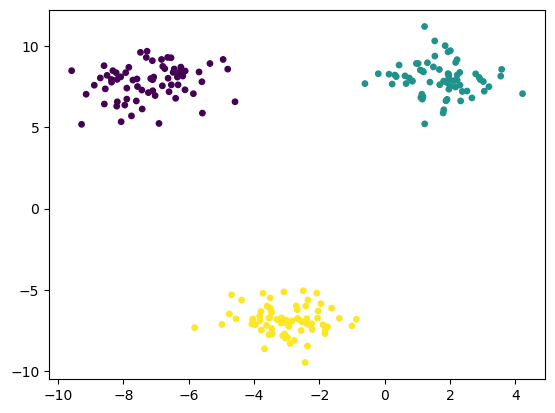

In [22]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,s=15)
plt.show()

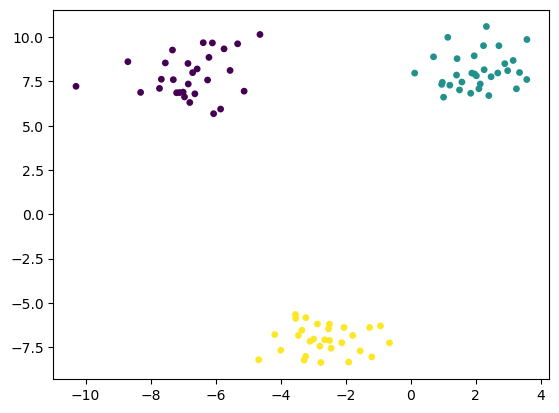

In [23]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,s=15)
plt.show()

## sklearn划分数据集

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.7, random_state = 233)

In [27]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210, 2), (90, 2), (210,), (90,))

In [28]:
from collections import Counter #该函数可以快速统计可迭代对象（如列表）中元素出现的次数
Counter(y_test)
# 数据集均匀划分的同时，类别并没有进行均匀划分普通划分的方式未兼顾类别的均匀分布

Counter({2: 34, 1: 31, 0: 25})

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.7, random_state = 233,stratify = y)
# stratify=y : 基于标签y进行分层抽样，使得划分后的数据集、测试集中各类别样本比例与原始数据一致

In [30]:
Counter(y_test)

Counter({2: 30, 0: 30, 1: 30})